# Plotting with Pride: colors in matplotlib

In this tutorial I explain some of the different ways you can use and manipulate colors in matplotlib.

## Part 1: Named Colors

You may already know that you can pass a color argument through commonly used plotting functions to set the color of your lines and points. Any common color will do, but there are actually more than a thousand named colors recognized by matplotlib.

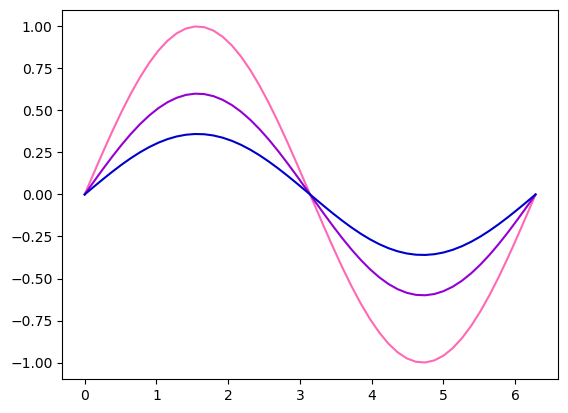

In [381]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi)
y = np.sin(x)

plot_colors = ['hotpink','darkviolet','mediumblue']
A = 1.
for c in plot_colors:
    plt.plot(x,A*y, c=c)
    A *= 0.6

There are four main groups of named colors in matplotlib: the default Tableau 10 Palette, 8 single character "base" colors, CSS colors, and all the colors from the xkcd survey (https://xkcd.com/color/rgb/). Their names and RGB tuples or HTML hex codes are available in dictionaries in the colors module:

In [2]:
import matplotlib.colors as mcolors

mcolors.BASE_COLORS #these colors can be called with a single character

mcolors.TABLEAU_COLORS #the default color cycle colors

mcolors.CSS4_COLORS #named colors also recognized in css

mcolors.XKCD_COLORS #named colors from the xkcd survey

Colors in the Tableau palette must be prefaced with "tab:"

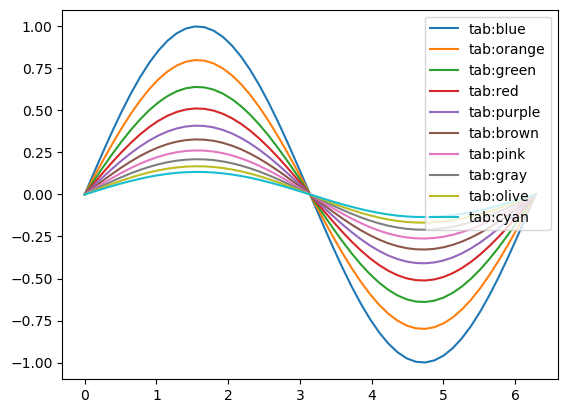

In [382]:
A = 1.
for color in mcolors.TABLEAU_COLORS:
    plt.plot(x, A * y, c=color, label=color)
    A *= 0.8
plt.legend()

Similarly, xkcd colors must be prefaced with "xkcd:"

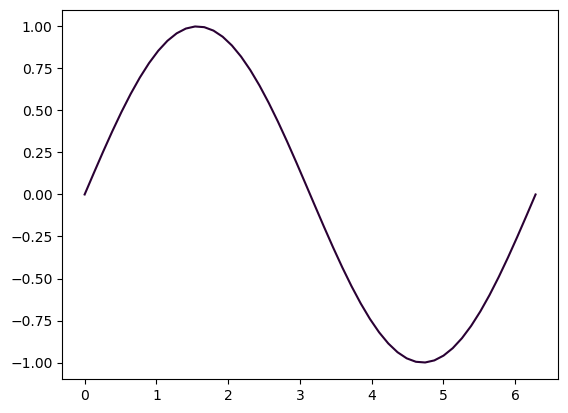

In [383]:
plt.plot(x, y, c= mcolors.XKCD_COLORS['xkcd:very dark purple'])

All named colors are in $\texttt{_colors_full_map}$. You can check if a color you are thinking of will be recognized by matplotlib by searching in there:

In [5]:
'tomato' in list(mcolors._colors_full_map.keys())

True

If you would like to peruse, just run this code:

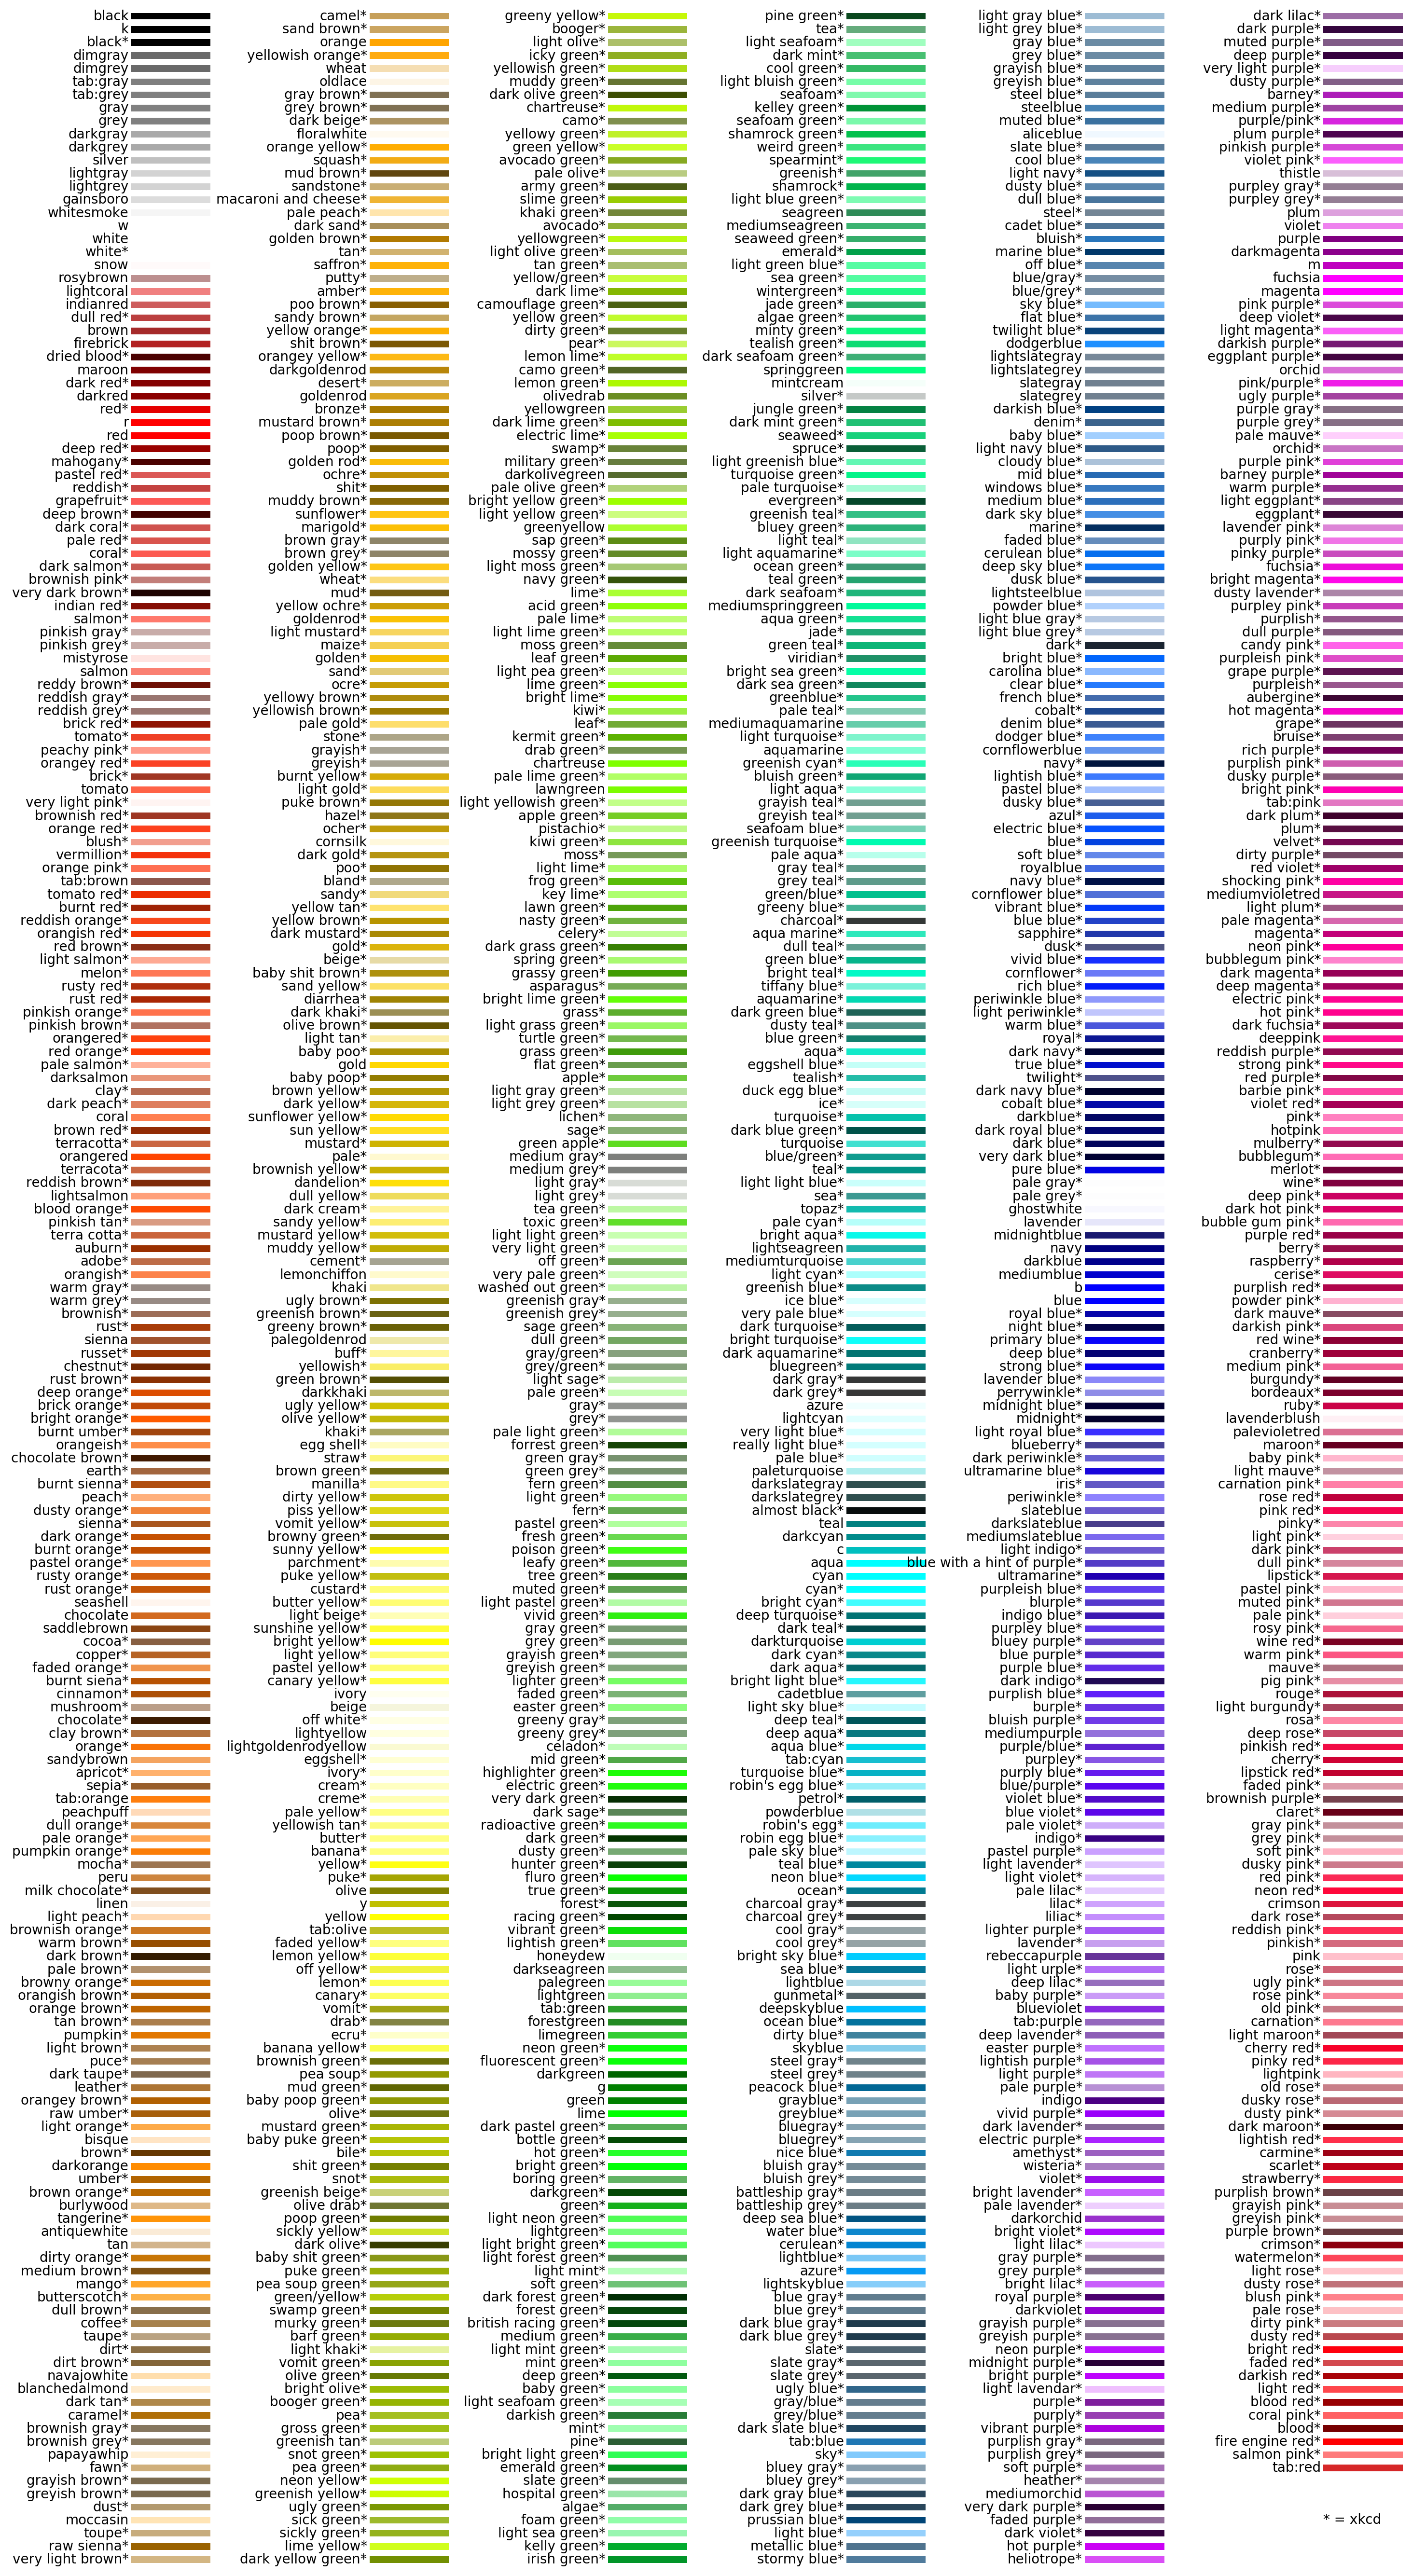

In [6]:
from matplotlib.gridspec import GridSpec

colors = mcolors._colors_full_map #dictionary of all colors

#sort them by hsv
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

def plot_all_colors():
    fig = plt.figure(figsize=(17,35),dpi=200)
    grid = GridSpec(195,6,hspace=1,wspace=2)
    counter = 0
    while counter < 1163:
        column = (counter//195)%6
        row = counter%195
        ax = fig.add_subplot(grid[row,column])
        ax.axis('off')
        ax.axhline(0,linewidth=15,c=sorted_names[counter])
        color_str = sorted_names[counter]
        #recall that xkcd colors must be prefaced with "xkdc:". To save space, I'll take that out
        #and replace with an asterisk so we can still identify them
        if 'xkcd' in color_str:
            color_str = color_str[5:]+'*'
        ax.text(-0.03,0.5,color_str,ha='right',va='center')
        counter+=1
    else:
        ax = fig.add_subplot(grid[-4,-1])
        ax.axis('off')
        ax.text(0,0,'* = xkcd')
#         fig.savefig('matplotlib named colors.png', bbox_inches='tight') #uncomment to save figure
            
plot_all_colors()

You can also pass in RGB tuples and HTML hex codes. The former must be values between 0 and 1 (divide by 255 if you have a RBG tuple not in that interval), and the latter has to be a string.

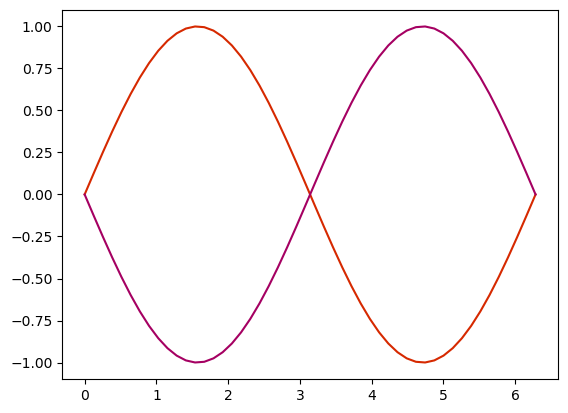

In [384]:
plt.plot(x, y, c = (0.84, 0.16, 0))
plt.plot(x, -y, c = '#A50062')

If you search "color picker" in Google, the search engine will provide you an interactive tool with color sliders that provides RGB and HTML hex codes, of which there are 16 million different possible values.

To get the RGB tuple or HTML hex code of a color you know the same of, you can use the $\texttt{to_rgb}$ and $\texttt{to_hex}$ functions:

In [17]:
print(mcolors.to_rgb('teal'))
print(mcolors.to_hex('chartreuse'))

(0.0, 0.5019607843137255, 0.5019607843137255)
#7fff00


You're not limited to just lines and points: you can set the color of every aspect of your plot.

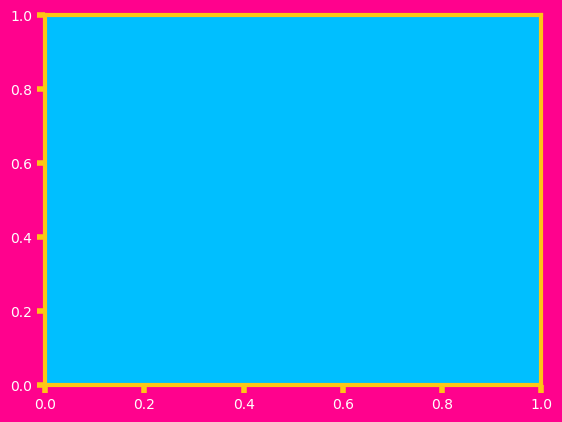

In [426]:
fig, ax = plt.subplots(facecolor='xkcd:hot pink') #the figure facecolor will set the color of the outside margins 
ax.set_facecolor('deepskyblue') #the axis facecolor will set the color within the axis bounds

#axis line color
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_linewidth(3) #making them thicker to see them better
    ax.spines[spine].set_color('xkcd:golden yellow')
    
#ticks and their labels
ax.tick_params(length=6, width=4,color='xkcd:golden yellow', labelcolor='white',labelsize=10)

If there's a color scheme you like, you can set it to your rcParams to keep the rest of your plots like that for the rest of your script or notebook. Here's a figure style based on my alma mater:

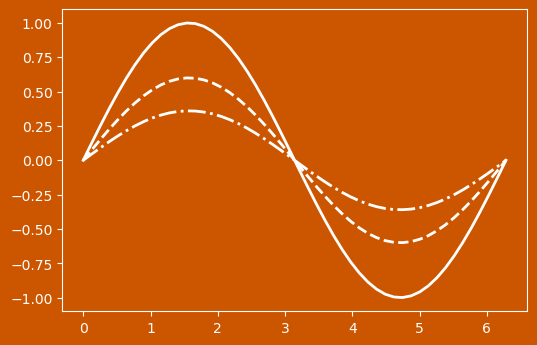

In [379]:
import matplotlib as mpl
from cycler import cycler

mpl.rcParams['figure.facecolor'] = '#cc5500'
mpl.rcParams['figure.edgecolor'] = '#cc5500'
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['axes.facecolor'] = '#cc5500'
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['lines.color'] = 'white'
mpl.rcParams['axes.prop_cycle'] = cycler(linestyle=['-','--','-.',':'])
mpl.rcParams['lines.linewidth'] = 2

A = 1.
for i in range(3):
    plt.plot(x,A*y)
    A *= 0.6

Call $\texttt{mpl.rcParams.keys()}$ to see everything you can change. Use rcParamsDefault to return to default:

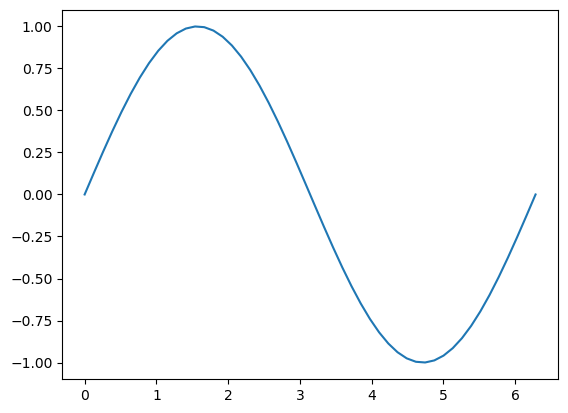

In [380]:
mpl.rcParams.update(mpl.rcParamsDefault)

plt.plot(x,y)

## Part 2: Color cycle

By default, plot colors cycle through the 10 Tableau Palette colors. While you could set the color for each plot manually or in a loop, you can also set the color cycle to whatever you want by setting the property cycle attribute of your axis:

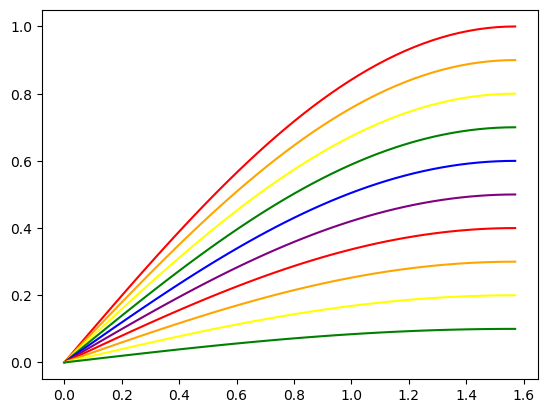

In [386]:
x = np.linspace(0,0.5*np.pi)
ys = np.ones((10,50)) * np.sin(x)
ys = np.array([ys[i,] * np.linspace(1,0.1,10)[i] for i in range(10)])

fig, ax = plt.subplots()
ax.set_prop_cycle(color=['red','orange','yellow','green','blue','purple'])
ax.plot(x, ys.T)

You can also add this color cycle to your rcParams to set this for all the plots in your notebook or script so you don't have to do this every time:

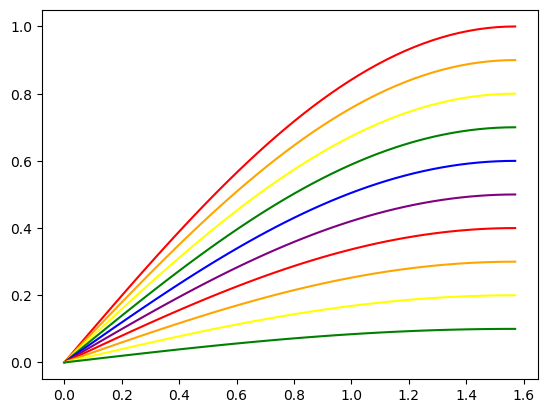

In [387]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['red','orange','yellow','green','blue','purple'])

plt.plot(x, ys.T)

You can also use the string "CN", where N is the position in the color cycle, to get that specific color:

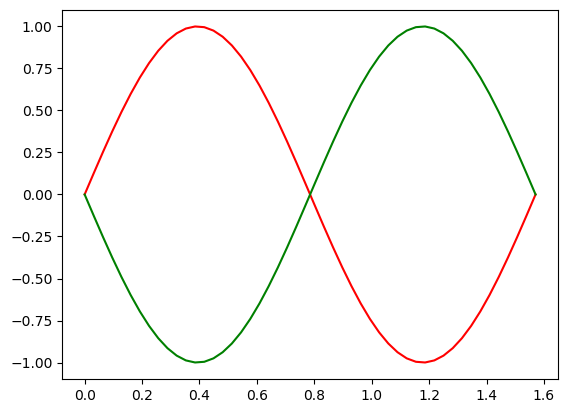

In [388]:
plt.plot(x, y, c='C0') #red is the first in my new color cycle
plt.plot(x, -y, c='C3') #green is the fourth

matplotlib also has a built-in color cycle that is more accessible for those with color vision deficiency. You can use it by using the tableau-colorblind10 style sheet:

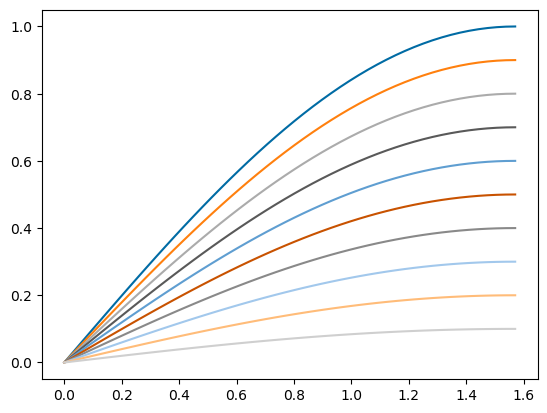

In [389]:
import matplotlib.style as style
style.use('tableau-colorblind10')

plt.plot(x, ys.T)

There is also seaborn-colorblind:

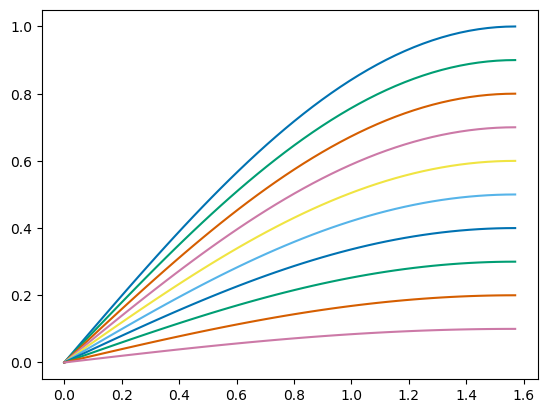

In [390]:
style.use('seaborn-colorblind')

plt.plot(x, ys.T)

You can also set the linestyle property cycle to reduce the ambiguity of color:

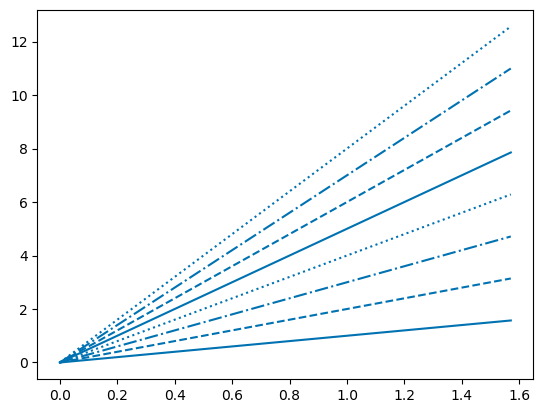

In [391]:
fig, ax = plt.subplots()
ax.set_prop_cycle(linestyle=['-','--','-.',':'])
ax.plot(x, np.array([x*c for c in range(1,9)]).T)

## Part 3: colormaps

You may also be familiar with setting colormaps, such as when using the imshow function. The default is called "viridis", but there are many built-in colormaps in matplotlib.

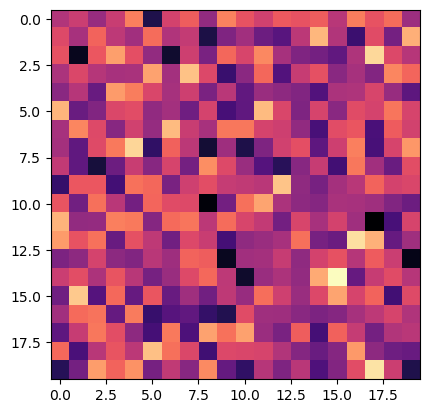

In [392]:
data = np.random.randn(20, 20)

plt.imshow(data, cmap='magma')

plt.colormaps() returns a list of all 164 built-in colormaps. This includes 82 colormaps and their reverse, which you can call by adding '_r' after the name of your desired colormap. You can run the functions below to plot all of them up:

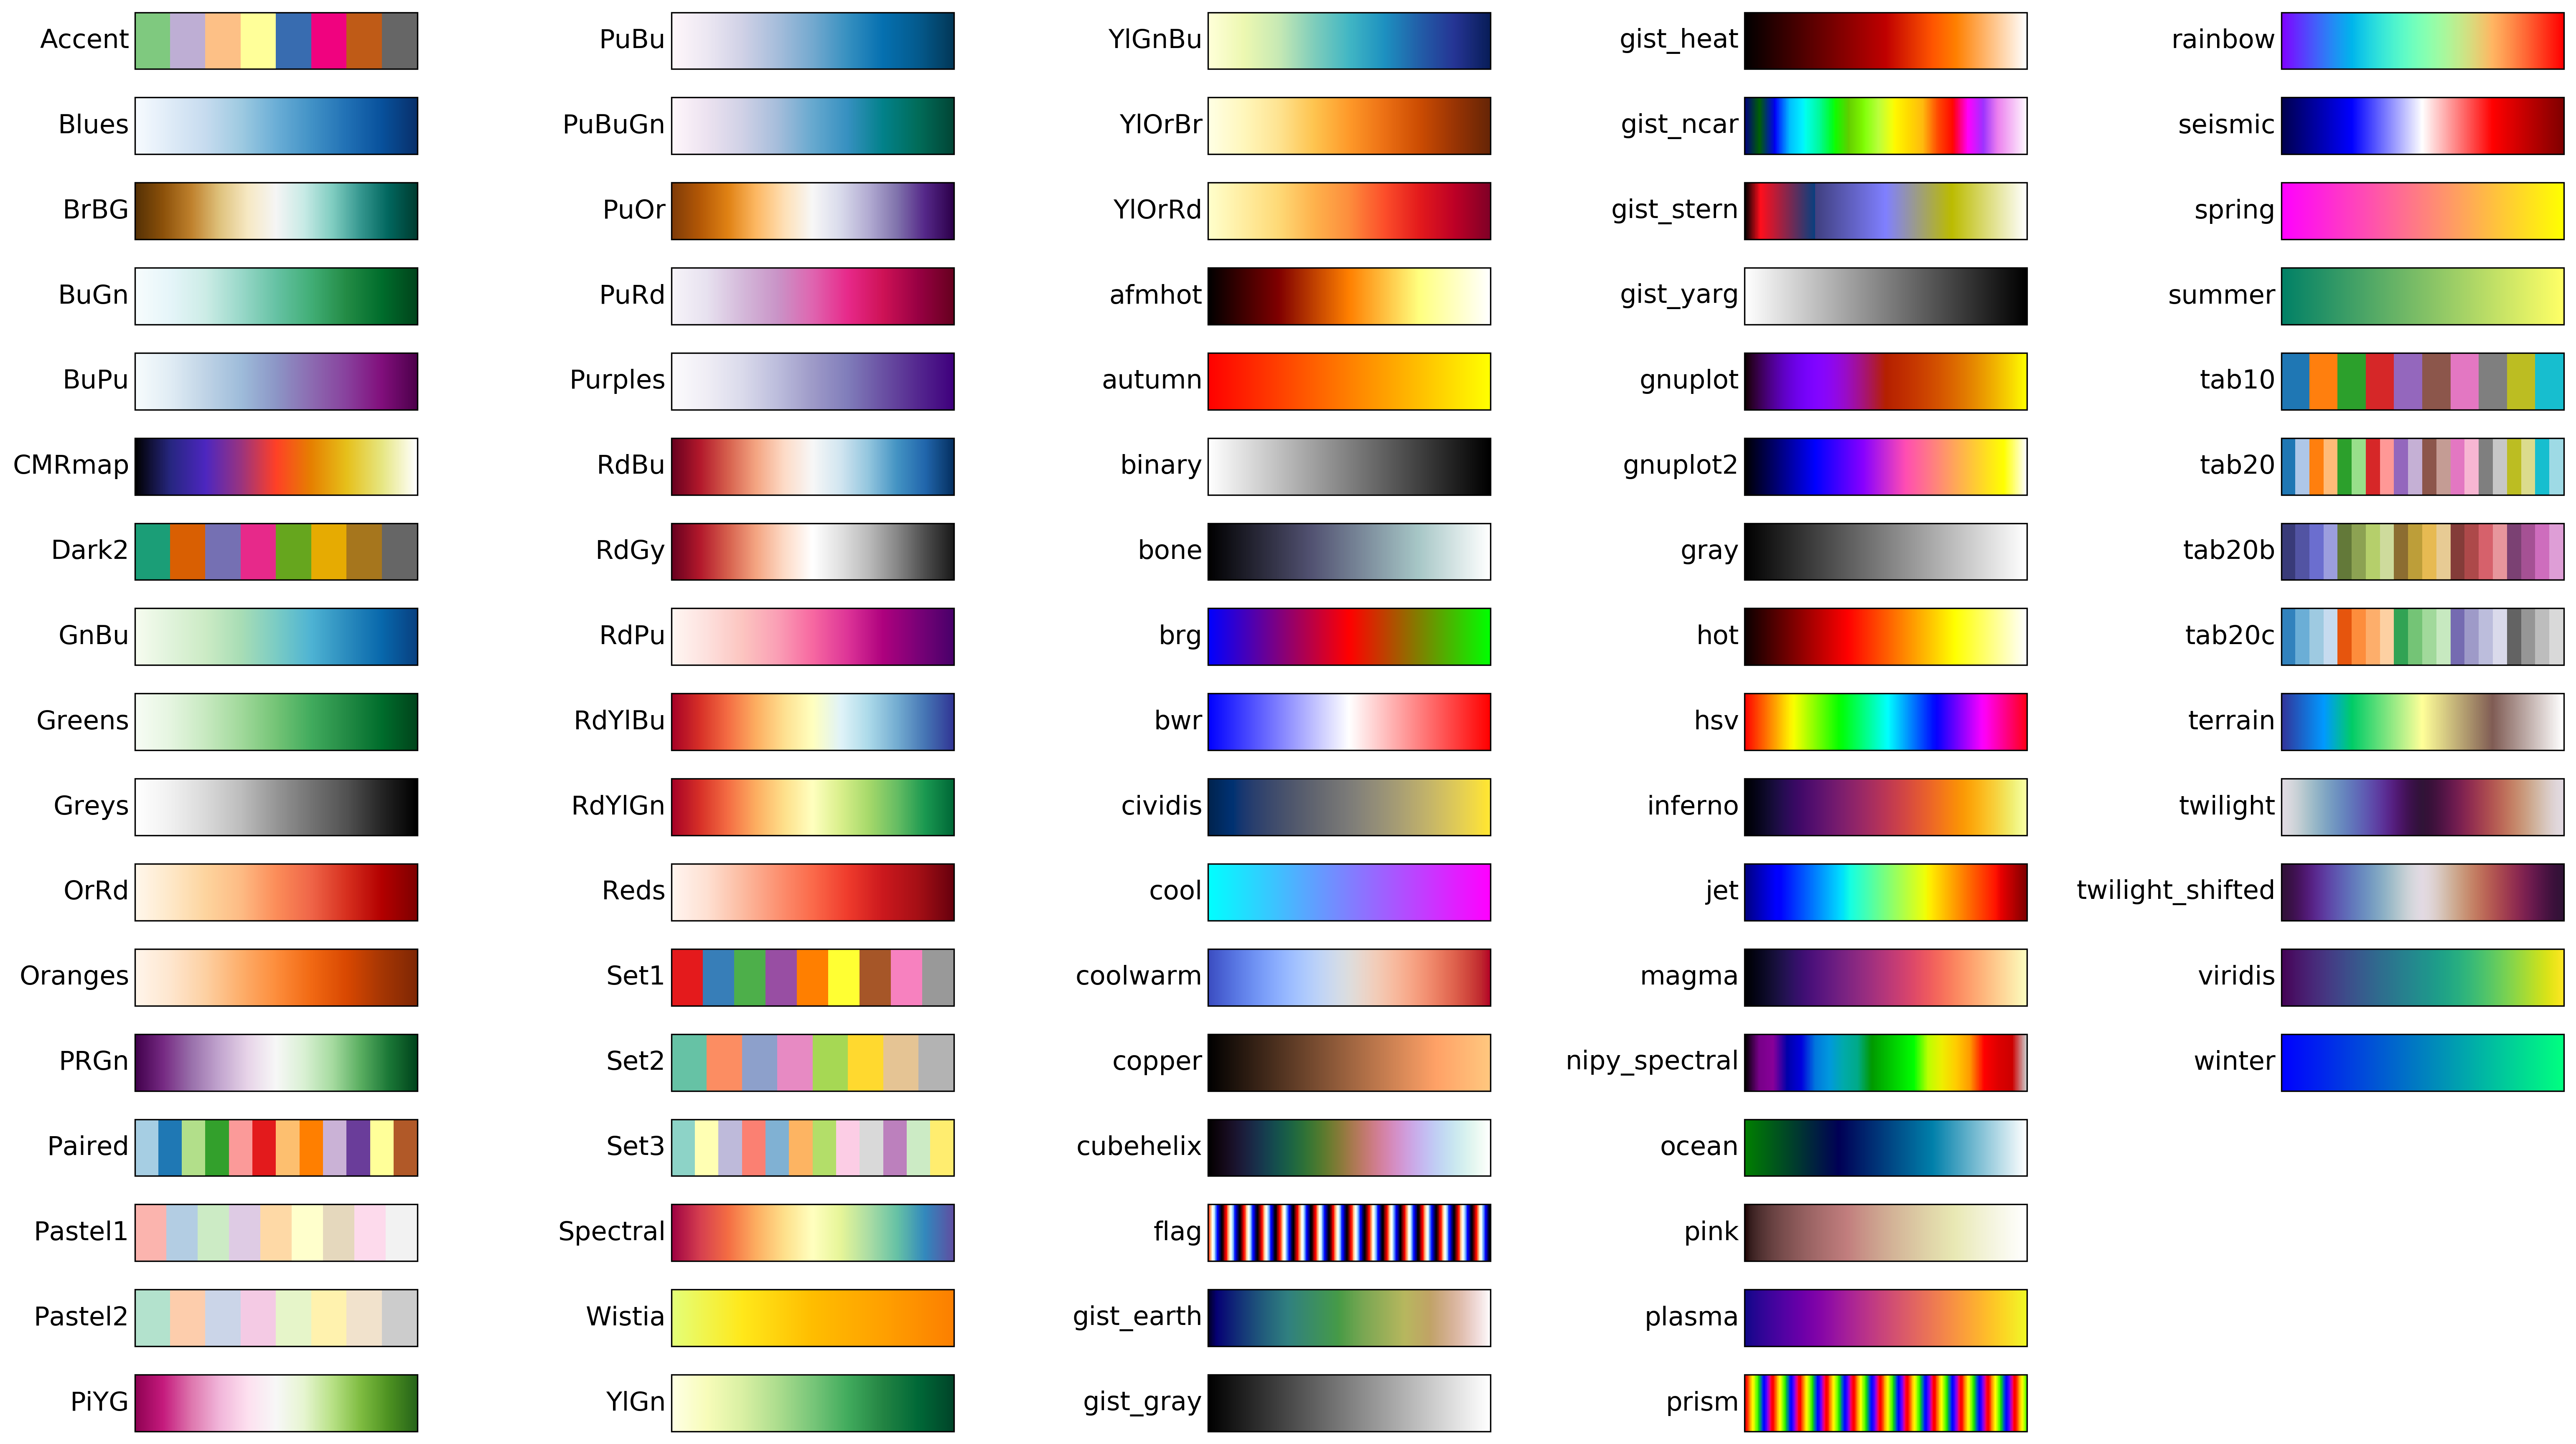

In [102]:
def plot_all_colormaps():
    '''
    This function will only plot the 82 built in colormaps.
    '''
    fig = plt.figure(facecolor='white',figsize=(25,15),dpi=300)
    grid = GridSpec(17, 5,hspace=.5,wspace=0.9)
    strings = [s for s in plt.colormaps() if "_r" not in s]
    counter = 0
    while counter < 81:
        column = (counter//17)%5
        row = counter%17
        ax = fig.add_subplot(grid[row,column])
        ax.axis('off')
        cmap_str = strings[counter]
        color_map = plt.get_cmap(cmap_str)
        mpl.colorbar.ColorbarBase(ax, cmap=color_map, orientation = 'horizontal')
        ax.text(-0.02,0.5,cmap_str,ha='right',va='center',fontsize=15)
        counter += 1
    else:
#         fig.savefig('matplotlib colormaps.png',bbox_inches='tight') #uncomment this if you want to save the figure
        return
          
def plot_all_colormaps2():
    '''
    This function will plot the 82 colormaps and their reverse.
    '''
    fig = plt.figure(facecolor='white',figsize=(25,15),dpi=300)
    grid = GridSpec(41, 4,hspace=.5,wspace=0.9)
    counter = 0
    while counter < 164:
        column = (counter//41)%4
        row = counter%41
        ax = fig.add_subplot(grid[row,column])
        ax.axis('off')
        cmap_str = plt.colormaps()[counter]
        color_map = plt.get_cmap(cmap_str)
        mpl.colorbar.ColorbarBase(ax, cmap=color_map, orientation = 'horizontal')
        ax.text(-0.02,0.5,cmap_str,ha='right',va='center',fontsize=15)
        counter += 1
    else:
#         fig.savefig('matplotlib colormaps.png',bbox_inches='tight') #uncomment this if you want to save the figure
        return

plot_all_colormaps()

There are four main types of colormap: sequential colormaps increase incrementally in brightness or hue. This is useful for representing data in the which the order matters:

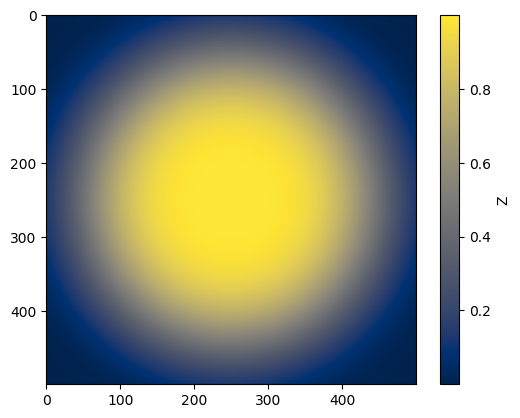

In [393]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

X, Y = np.meshgrid(np.linspace(-2,2,500),np.linspace(-2,2,500))

Z = gaussian(X**2 + Y**2, 0, 2)

plt.imshow(Z,cmap = 'cividis')
plt.colorbar(label='Z')

The perceptually uniform sequential colormaps (viridis, plasma, inferno, magma, and cividis) are generally the more accessible colormaps for those with color vision deficiency.

Diverging colormaps have two colors that also change in brightess and hue to meet at some neutral color in the middle. These are good to show change from some value of interest.

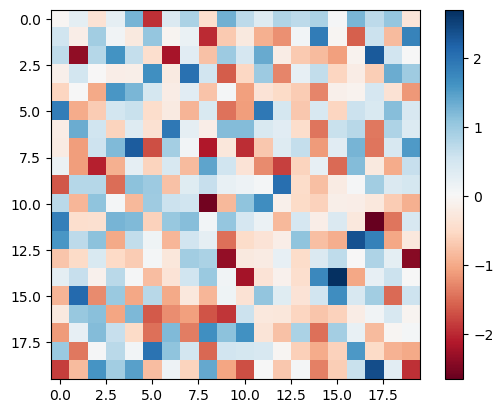

In [394]:
plt.imshow(data, cmap='RdBu')
plt.colorbar()

Cyclic colormaps come back to meet each other at each end, which is good for values that repeat or come back onto themselves.

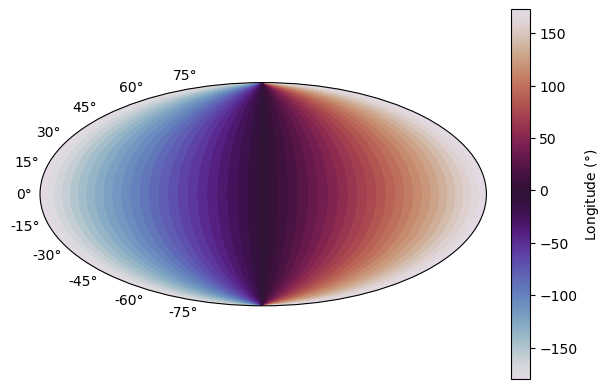

In [395]:
latitudes, longitudes = np.meshgrid(np.linspace(-0.5*np.pi, 0.5*np.pi), np.linspace(-np.pi, np.pi))

fig = plt.figure()
ax = fig.add_subplot(projection='hammer')
ax.set_xticks([])
mesh = ax.pcolormesh(longitudes, latitudes, longitudes * 180/np.pi, cmap='twilight')
plt.colorbar(mesh, label='Longitude ($\degree$)',fraction=0.05)

Qualitative colormaps don't have specific ordering and so are better suited for data sets in which the order doesn't matter, or you can use them to choose a list of colors (which we'll get to in a later section).

As I've shown above, colormaps don't only have use in imshow: you can use the color to plot a third variable in scatter plots:

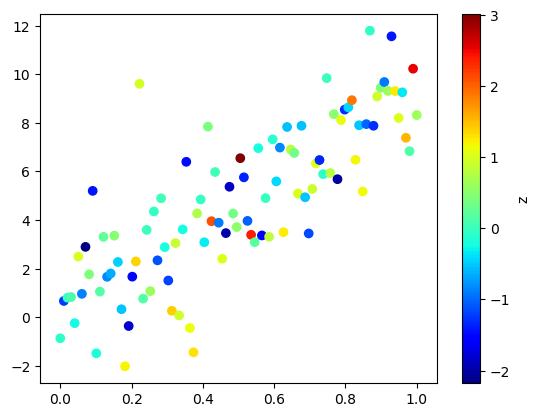

In [396]:
x = np.linspace(0,1,100)
y = np.linspace(0,10,100) + np.random.normal(0,2,100)
z = np.random.normal(0,1,100)

#set the "c" kwarg to the array of values the colors are based on
plt.scatter(x,y,c=z,cmap='jet')
plt.colorbar(label='z')

We can also use colormaps for some third variable in line plots. Using a line collection will make plotting several related line plots both easy and efficient:

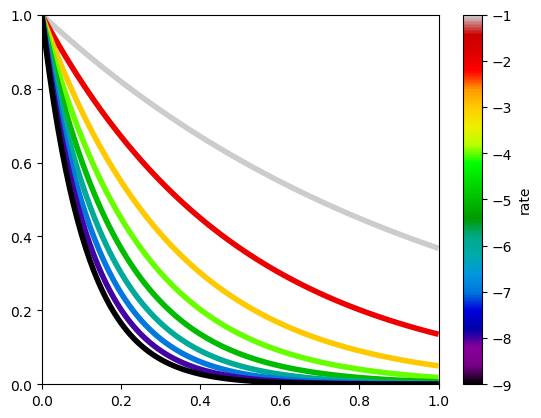

In [397]:
from matplotlib.collections import LineCollection

rates = np.arange(-1,-10,-1) #some arbitrary rate of decay

#Below, lines is a list of 2D arrays. Each of these arrays consists of
#a column of x values and y values. We just generated an array 9 different
#rates, so lines will have shape (9, 200, 2), or (Nlines, Npoints, Nvariables (x and y))
lines = [np.column_stack([x, np.exp(rate * x)]) for rate in rates]

fig, ax = plt.subplots()

#the array kwarg is the array to which we set the colors, similar to the c arg in scatter()
lc = LineCollection(lines, cmap='nipy_spectral',array=rates,linewidth=4)
line = ax.add_collection(lc) #add to the subplot
fig.colorbar(line, label='rate')

If you're plotting a continuous function, you can also add a nice gradient with pyplot.scatter:

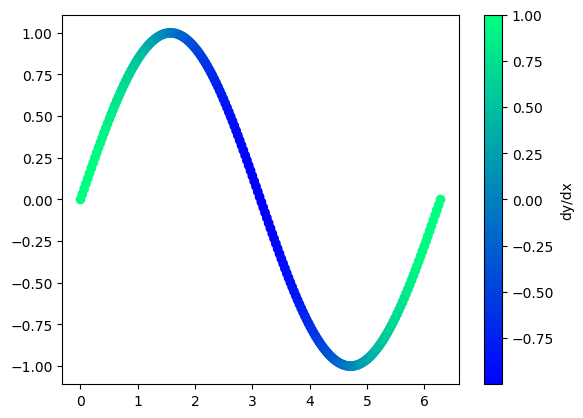

In [398]:
x = np.linspace(0,2*np.pi,200)
y = np.sin(x)
dydx = np.cos(x)

plt.scatter(x,y,c=dydx,cmap='winter')
plt.colorbar(label='dy/dx')

However, if you have too few points, your data might not appear as one continuous line. Fortunately, you can also add changing color to line plots by using a line collection:

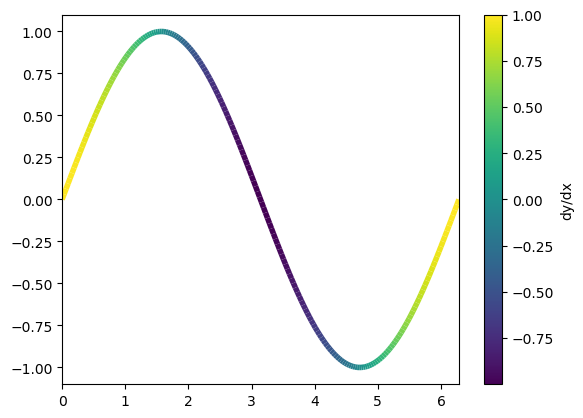

In [399]:
#similar to above, we're going to make a 3D array of the lines we want to plot.
#We can only give each line one color, but by splitting the one line we want to plot
#into several segments, we can give each segment a color to get a gradient effect.
#To do this, instead of having the entire x and y arrays as columns in the 2D arrays
#that make up the greater lines array, our columns will now only have 2 points: the 
#two endpoints of each segment.

#remember, slicing is upper bound exclusive, so we say i+2 when we mean the "i+1th" element
segments = [np.column_stack([x[i:i+2], y[i:i+2]]) for i in range(len(x) - 1)]
#this list has shape (200, 2, 2), so 200 lines with 2 points for 2 variables

fig, ax = plt.subplots()

ax.axis([0,2*np.pi,-1.1,1.1]) #set axis limits. This is [xlow, xhigh, ylow, yhigh]

lc = LineCollection(segments, cmap='viridis',array=dydx,linewidth=4)
line = ax.add_collection(lc)
plt.colorbar(line, label='dy/dx')

If there's a range of values you don't care about, or a range you want to focus on, you can use the vmin and vmax arguments:

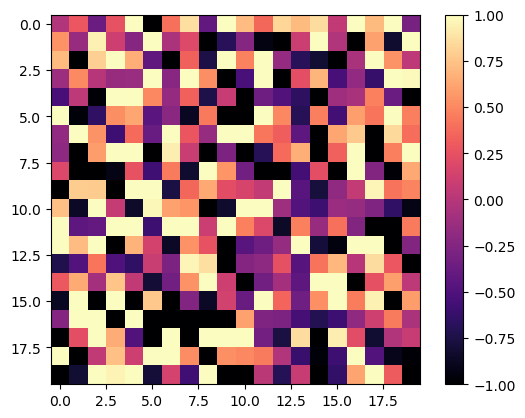

In [400]:
plt.imshow(data, vmin = -1, vmax=1,cmap='magma')
plt.colorbar()

## Part 4: Colormap normalization

Real life data is complicated! What if our data isn't linearly ordered? 

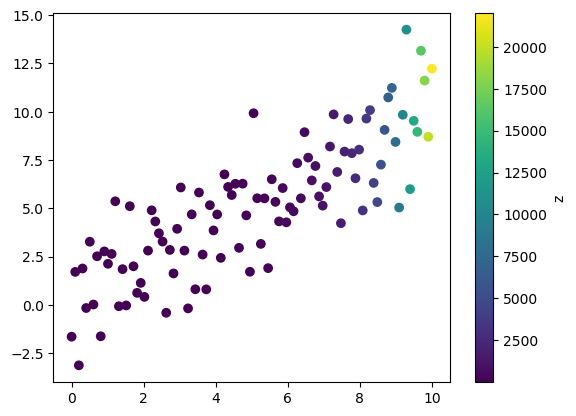

In [401]:
x = np.linspace(0,10,100)
y = np.linspace(0,10,100) + np.random.normal(0,2,100)
z = np.exp(x)

plt.scatter(x,y, c= z)
plt.colorbar(label='z')

We're not learning much from the colors in the above plot. By default, colormaps map colors linearly from the minimum to maximum value. Luckily, we can map the colors in the colormap according to a Normalization class. For the plot above, let's try normalizing it to a logarithmic scale using the LogNorm function in the colors module.

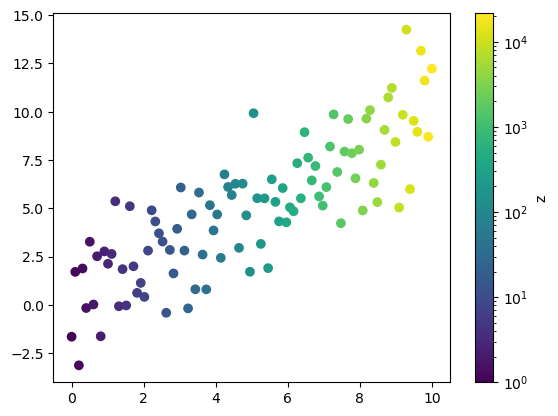

In [402]:
norm = mcolors.LogNorm(vmin=z.min(), vmax=z.max())

plt.scatter(x, y, c= z, norm= norm)
plt.colorbar(label='z')

Much better! Similarly, you can normalize to a power law relationship with PowerNorm. PowerNorm takes the argument gamma, which is the power the color values will be mapped to.  

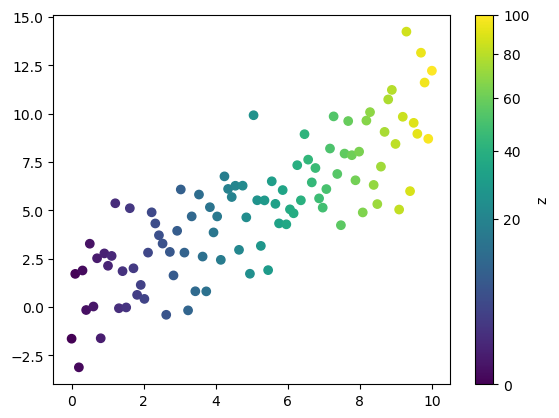

In [403]:
z = x**2

norm = mcolors.PowerNorm(gamma=0.5)
#notice that I did the inverse power of the data

plt.scatter(x,y, c=z, norm=norm)
plt.colorbar(label='z')

Now, let's consider again the example of random data around zero, except this time, presume that the distribution was not perfectly random and there was a skew in one direction. You'll notice, especially if you use a diverging colormap, that zero is not our center color, and in fact pixels with a value of zero will appear light red in the plot below:

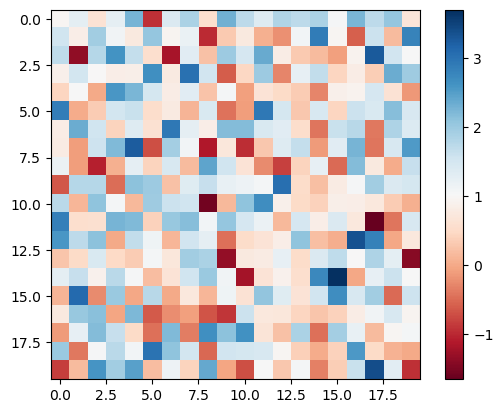

In [404]:
plt.imshow(data + 1., cmap='RdBu')
plt.colorbar()

This might be misleading, and we might miss important information, such as how our data tends more positive than negative. We can set the center of our colormap using DivergingNorm, which takes the argument vcenter:

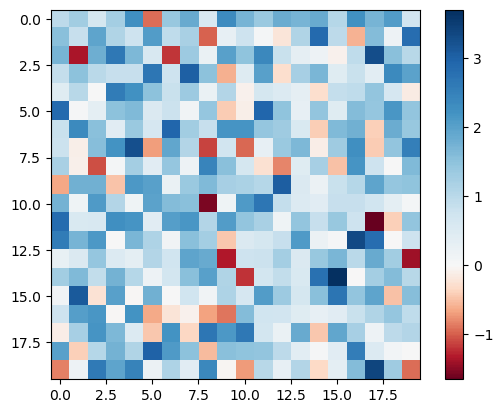

In [405]:
plt.imshow(data + 1., cmap='RdBu', norm=mcolors.DivergingNorm(vcenter = 0.))
plt.colorbar()

There, now it's much more clear that the data leans more positive than negative and that white pixels are zero.

If you want your colors to be discrete, you can use BoundaryNorm. The argument boundaries is the boundary values between colors, and ncolors is the number of discrete colors to choose from in your chosen colormap. By default, the built in colormaps have 256 colors, but this doesn't always have to be the case, as we'll see in the next section.

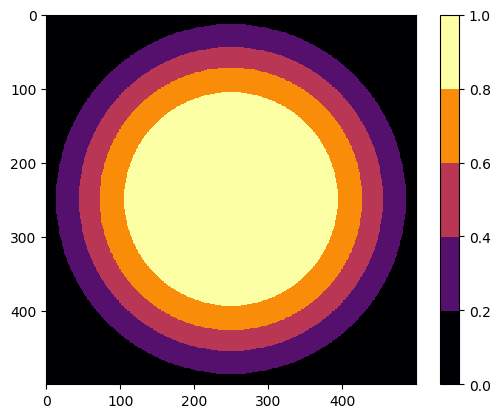

In [406]:
norm = mcolors.BoundaryNorm(boundaries = np.linspace(0,1,6), ncolors= 256)

plt.imshow(Z, norm=norm, cmap='inferno')
plt.colorbar(norm=norm)

Check out the documentation for a few other types of normalizations: https://matplotlib.org/stable/tutorials/colors/colormapnorms.html

## Part 5: Creating colormaps

Of course, you're not limited to just the built-in colormaps as-is. You can create your own for countless possibilities. Let's start by adjusting the built-in colormaps by getting a colormap instance with plt.get_cmap. If you would like the colors to be more discrete without setting a BoundaryNorm for each dataset, you can give an integer argument for the number of different color values: 

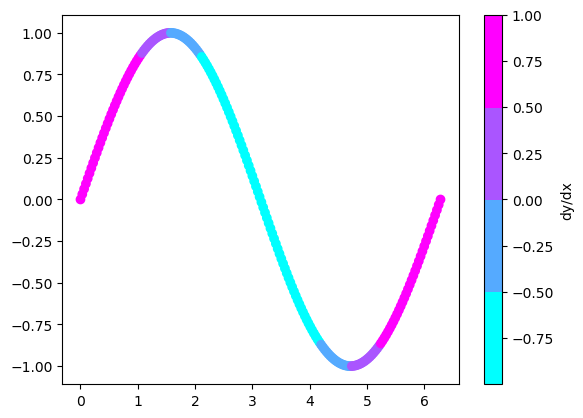

In [407]:
cmap = plt.get_cmap('cool',4) #I only want 4 colors from this cmap

x = np.linspace(0,2*np.pi,200)
y = np.sin(x)
dydx = np.cos(x)

plt.scatter(x,y,c=dydx,cmap=cmap)
plt.colorbar(label='dy/dx')

Our new colormap is a function that we can pass floats between 0 and 1 through. This returns an array with dimensions (N points x 4). The first three columns are the RGB tuple values for each point, and the fourth is the alpha (opacity/intensity). Let's create an array of colors that covers the full range of one of the built-in colormaps:

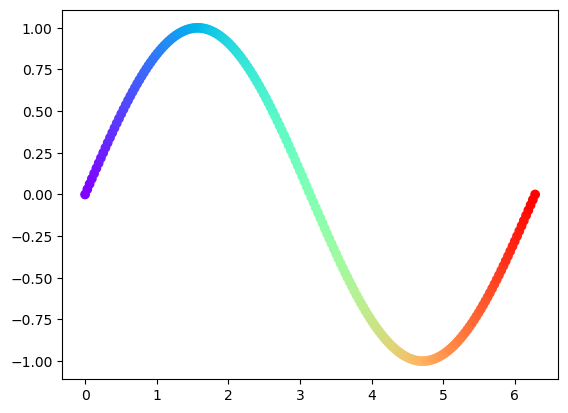

In [408]:
cmap = plt.get_cmap('rainbow')

colors = cmap(np.linspace(0,1,200)) #200 - a tuple for each data point

plt.scatter(x,y,c=colors)

We can limit the range of colors as well by not starting and ending at 0 and 1:

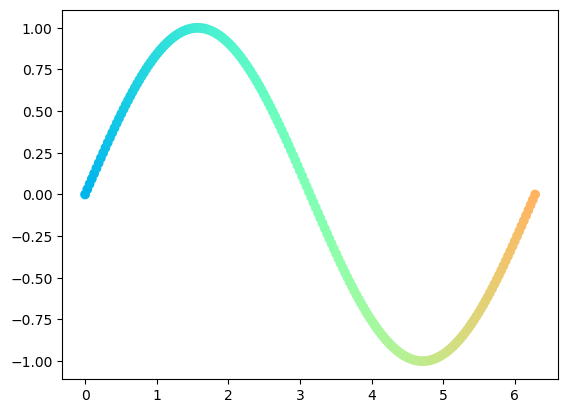

In [409]:
colors = cmap(np.linspace(0.25,0.75,200))

plt.scatter(x,y,c=colors)

The floats you pass through your colormap don't have to be linearly increasing from 0 to 1. You could get the reverse colormap by passing an array of values starting at 1 and going to 0, or you could make your colors cyclic by using a sinusoid. As long as it's normalized to be on [0,1], you can pass any array through the colormap.

We can also change the color array after its creation. Let's change the alphas of our plot to match the derivative:

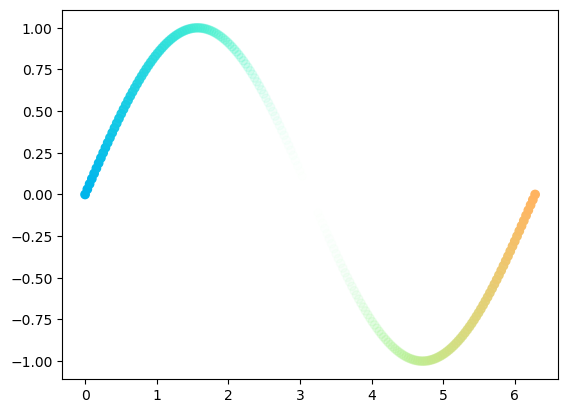

In [410]:
#alphas must have a value between 0 and 1
colors[:,3] = (dydx - dydx.min()) / (dydx - dydx.min()).max()

plt.scatter(x,y,c=colors)

Or, let's say I really like all but one color in a built in colormap. We can change that too:

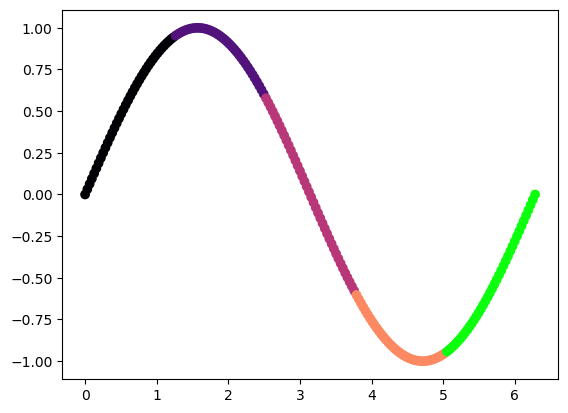

In [411]:
cmap = plt.get_cmap('magma', 5) #get 5 colors from the magma cmap

colors = cmap(np.linspace(0,1,200))
colors[160:] = mcolors.to_rgba('xkcd:neon green') #change the last color to green

plt.scatter(x,y, c=colors)

You can create a completely new colormap from a list of colors:

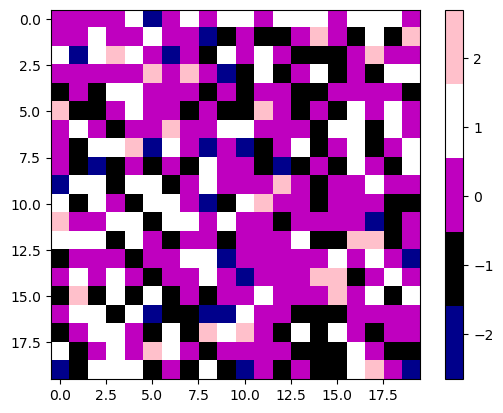

In [428]:
from matplotlib.colors import ListedColormap

new_cmap = ListedColormap(['darkblue','black','m','white','pink'])
plt.imshow(data, cmap=new_cmap)
plt.colorbar()

If you want a gradient of colors interpolated between this list, you can create a Linear segmented colormap:

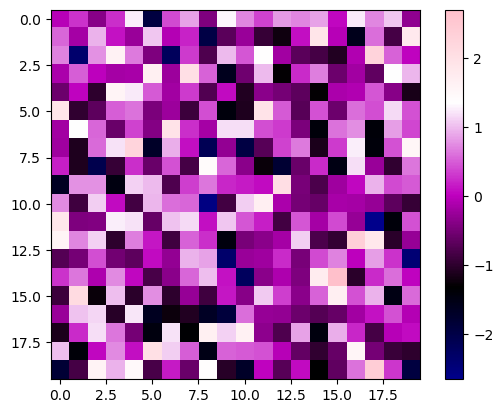

In [429]:
from matplotlib.colors import LinearSegmentedColormap

new_cmap = LinearSegmentedColormap.from_list("",['darkblue','black','m','white','pink'])

plt.imshow(data,cmap=new_cmap)
plt.colorbar()

You can also use nodes to give greater weight to one color:

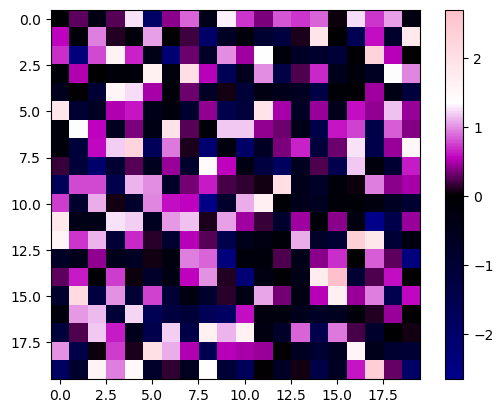

In [435]:
nodes = [0.0, 0.5, 0.6, 0.75, 1.0] #blue and black now take up most of the color space
color_list = ['darkblue','black','m','white','pink']
cmap2 = LinearSegmentedColormap.from_list("", list(zip(nodes, color_list)))

plt.imshow(data, cmap=cmap2)
plt.colorbar()

Now, it's easy to get carried away when making your own colormap. When using colors to represent an important dimension of your data, it's best to make things as clear as possible, which means the simpler the better. Usually, just two or three colors will get the job done. Consider a gradient between a light and dark color, or a light color between two darker colors if you want to highlight divergence from some baseline value:

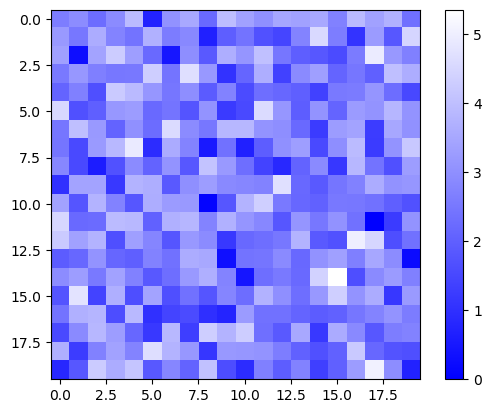

In [416]:
color_list = ['blue','white']
cmap = LinearSegmentedColormap.from_list("",color_list)

plt.imshow(data-data.min(),cmap=cmap)
plt.colorbar()

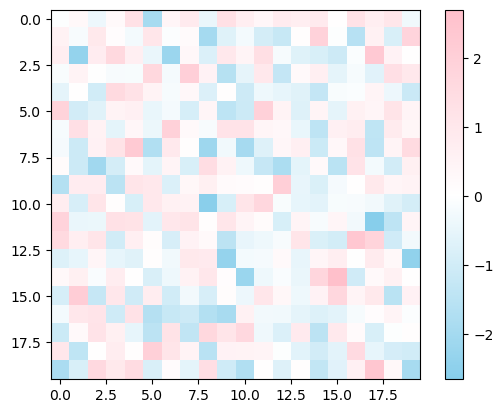

In [417]:
color_list = ['skyblue','white','pink']
cmap = LinearSegmentedColormap.from_list("",color_list)

plt.imshow(data,cmap=cmap)
plt.colorbar()

If you want more than three or four colors, it's best to remove any that are too similar and then sort the remaining by brightness. Take the colormap I created a couple of cells up. It's a little confusing with both blue and magenta on either side of black. We're seeing similar colors at different points on the scale, making it a little ambiguous.

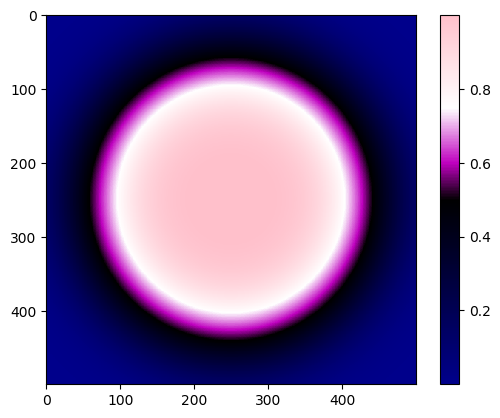

In [436]:
plt.imshow(Z,cmap = cmap2)
plt.colorbar()

What's happening on the edges? Is the value going back up? Our eye is also naturally drawn to brighter colors. Is there something special about that white ring?

Let's sort our colors by their brightness, for which I'll use the "value" in HSV:

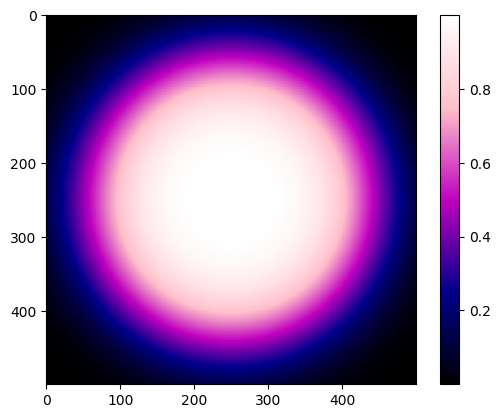

In [434]:
color_list = ['darkblue','m','black','white','pink']

by_hsv = sorted([(mcolors.rgb_to_hsv(mcolors.to_rgb(color))[2], color) for color in color_list])
sorted_list = [name for hsv, name in by_hsv]

cmap = LinearSegmentedColormap.from_list("",sorted_list)

plt.imshow(Z,cmap = cmap)
plt.colorbar()

Much better. You can clearly see that the maximum is in the center and then decreases from there.

You don't have to use colormaps in ways directly tied to your data. For example, you can add a gradient to your color cycle:

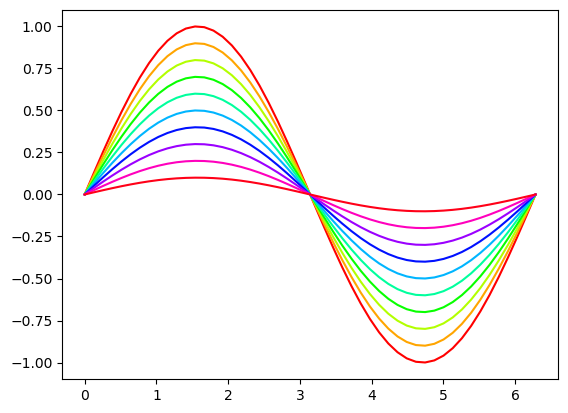

In [420]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0,1,10)) #get 10 colors along the full range of hsv colormap

x = np.linspace(0,2*np.pi)
ys = np.ones((10,50)) * np.sin(x)
ys = np.array([ys[i,] * np.linspace(1,0.1,10)[i] for i in range(10)])

fig, ax = plt.subplots()
ax.set_prop_cycle(color=colors) #set our 10 colors to the property cycle

plt.plot(x, ys.T)

Alternatively, you could use one of the perceptually uniform colormaps I mentioned above to make a more accessible color cycle.

You could even add a gradient to your axes:

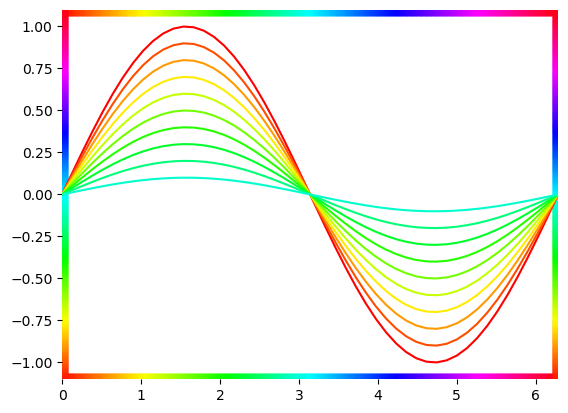

In [421]:
cmap = plt.get_cmap('hsv')
colors = cmap(np.linspace(0,1,200))

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1.1,1.1])

#get rid of the "monochromatic" spines
for spine in ['bottom','top','right','left']:
    ax.spines[spine].set_color('none')

#a "hack" to recreate our axes: just plot them up again
ax.scatter(np.linspace(0,2*np.pi,200),np.ones(200)*-1.1,marker='s',s=50,c=colors)
ax.scatter(np.linspace(0,2*np.pi,200),np.ones(200)*1.1,marker='s',s=50,c=colors)
ax.scatter(np.ones(200)*2*np.pi,np.linspace(-1.1,1.1,200),marker='s',s=50,c=colors)
ax.scatter(np.zeros(200),np.linspace(-1.1,1.1,200),marker='s',s=50,c=colors)

ax.set_prop_cycle(color=cmap(np.linspace(0,1,20)))

plt.plot(x, ys.T)

Here are some Pride inspired colormaps:

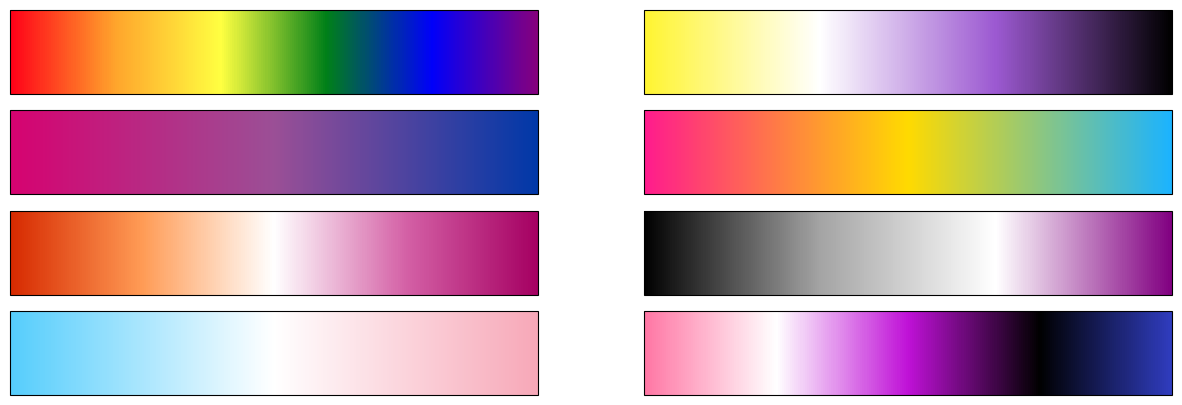

In [422]:
pride = LinearSegmentedColormap.from_list("pride",["#FF0018","#FFA52C","#FFFF41","#008018","#0000F9","#86007D"])

bi_pride = LinearSegmentedColormap.from_list("", ["#D60270", "#9B4F96", "#0038A8"])

trans_pride = LinearSegmentedColormap.from_list("",["#55CDFC","#FFFFFF","#F7A8B8"])

lesbian_pride = LinearSegmentedColormap.from_list("",["#D62900","#FF9B55","#FFFFFF","#D461A6","#A50062"])

nonbinary_pride = LinearSegmentedColormap.from_list("",["#FFF430","#FFFFFF","#9C59D1","#000000"])

pan_pride = LinearSegmentedColormap.from_list("",["#FF1B8D","#FFDA00","#1BB3FF"])

ace_pride = LinearSegmentedColormap.from_list("",["#000000","#A4A4A4","#FFFFFF","#810081"])

genderfluid_pride = LinearSegmentedColormap.from_list("",["#FF76A4","#FFFFFF","#C011D7","#000000","#2F3CBE"])

pride_cmaps = [pride, bi_pride, lesbian_pride, trans_pride, nonbinary_pride, pan_pride, ace_pride, genderfluid_pride]

def plot_pride_maps():
    fig = plt.figure(figsize=(15,5))
    grid = GridSpec(4,2)
    counter = 0
    while counter < 8:
        column = (counter//4)%2
        row = counter%4
        ax = fig.add_subplot(grid[row, column])
        ax.axis('off')
        mpl.colorbar.ColorbarBase(ax, cmap = pride_cmaps[counter], orientation='horizontal')
        counter += 1
    else:
        return

plot_pride_maps()

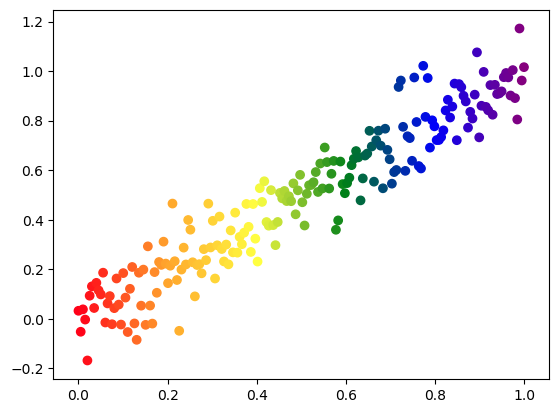

In [423]:
x = np.linspace(0,1,200)
y = np.linspace(0,1,200) + np.random.normal(0,0.1,200)
plt.scatter(x,y,c=x, cmap=pride)

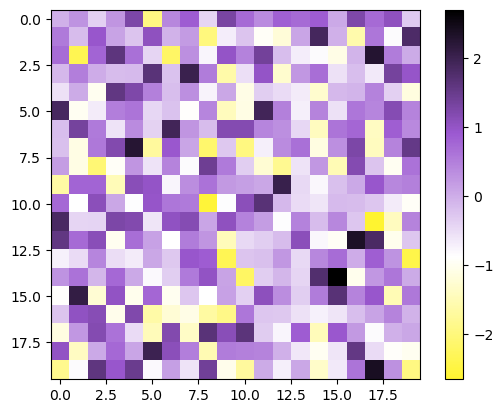

In [424]:
plt.imshow(data, cmap=nonbinary_pride)
plt.colorbar()

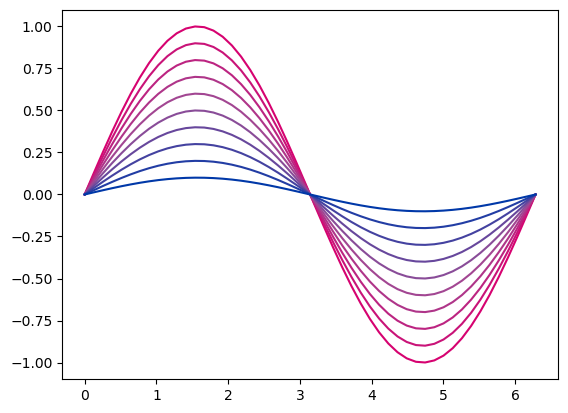

In [425]:
fig, ax = plt.subplots()

ax.set_prop_cycle(color=bi_pride(np.linspace(0,1,10)))

x = np.linspace(0,2*np.pi)

plt.plot(x, ys.T)

That's all for now! If you have any questions or want to show me your colorful plots, reach out on twitter @ExoplanetPete. Happy plotting, and happy Pride!